# Text Analysis in Python

## Introduction

In this workshop, we will be learning a text analysis technique in Python: sentiment analysis. 
This techniques can help us come up with new insights or answer questions we have about the text.

The data we are using is a collection of two thousand movie reviews categorized by Bo Pang and Lillian Lee, which we will be downloading and performing sentiment analysis on.

The contents of this workshop have been adapted from: 

* the Natural Language Processing in Python Tutorial by Alice Zhao

https://github.com/adashofdata/nlp-in-python-tutorial

* Sentiment Analysis: First Steps With Python's NLTK Library by Marius Mogyorosi

https://realpython.com/python-nltk-sentiment-analysis/#using-nltks-pre-trained-sentiment-analyzer

Data retrieved from:

* Movie Review Data
(https://www.cs.cornell.edu/people/pabo/movie-review-data/)


## Sentiment Analysis

### Introduction

Sentiment analysis can help determine the sentiment of a text - how positive or negative it is. This is useful for sorting out the positive and negative comments of a specific topic and can be used on many examples (reviews, tweets, feedback).

### Getting the data

First, we install NLTK (Natural Language Toolkit), a Python package for NLP (Natural Language Processing).
It contains text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning.
hello

In [1]:
!pip install nltk

From NLTK, we will need to download the resrouces that we are using today, including the movie review data that we are analysing. 

* names: A list of common English names compiled by Mark Kantrowitz
* stopwords: A list of really common words, like articles, pronouns, prepositions, and conjunctions
* movie_reviews: Two thousand movie reviews categorized by Bo Pang and Lillian Lee
* vader_lexicon: A scored list of words and jargon that NLTK references when performing sentiment analysis, created by C.J. Hutto and Eric Gilbert

In [5]:
import nltk

#nltk.download()
nltk.download(['vader_lexicon', "movie_reviews", 'stopwords', 'names', 'punkt','averaged_perceptron_tagger'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\theresa.lee\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\theresa.lee\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\theresa.lee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package names to
[nltk_data]     C:\Users\theresa.lee\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\theresa.lee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\theresa.lee\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_

True

### Cleaning the data

Now that we have the movie review data, we need to begin cleaning the data. This will standardise the text and remove text and characters that are not relevant.

First, we create a list of all the words in the text, excluding punctuation marks and numbers.

In [3]:
words = [w for w in nltk.corpus.movie_reviews.words() if w.isalpha()]

We also want to exclude stop words, which we already downloaded earlier. We also make all the words in our list lower case.

In [6]:
stopwords = nltk.corpus.stopwords.words("english")

In [5]:
clean_words = [w for w in words if w.lower() not in stopwords]

In [6]:
combined_words = ' '.join(clean_words)

### Word frequency

One of the uses of NLTK is finding the frequency distribution of each word in the text.

In [7]:
# Tokenization splits text into smaller pieces (ie a token). Tokens can be words or sentences.
def word_frequency(text):
    text = nltk.word_tokenize(text)
    fd = nltk.FreqDist(text)
    return fd

In [8]:
fd = word_frequency(combined_words)
fd.most_common(20)

[('film', 9517),
 ('one', 5852),
 ('movie', 5771),
 ('like', 3690),
 ('even', 2565),
 ('good', 2411),
 ('time', 2411),
 ('story', 2169),
 ('would', 2109),
 ('much', 2049),
 ('character', 2020),
 ('also', 1967),
 ('get', 1949),
 ('two', 1911),
 ('well', 1906),
 ('characters', 1859),
 ('first', 1836),
 ('see', 1749),
 ('way', 1693),
 ('make', 1642)]

In [9]:
fd.tabulate(10)

 film   one movie  like  even  good  time story would  much 
 9517  5852  5771  3690  2565  2411  2411  2169  2109  2049 


In [10]:
fd["romance"]

184

In [11]:
lower_fd = nltk.FreqDist([w.lower() for w in fd])

In [12]:
lower_fd["America"]

0

In [7]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(stopwords=stopwords, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

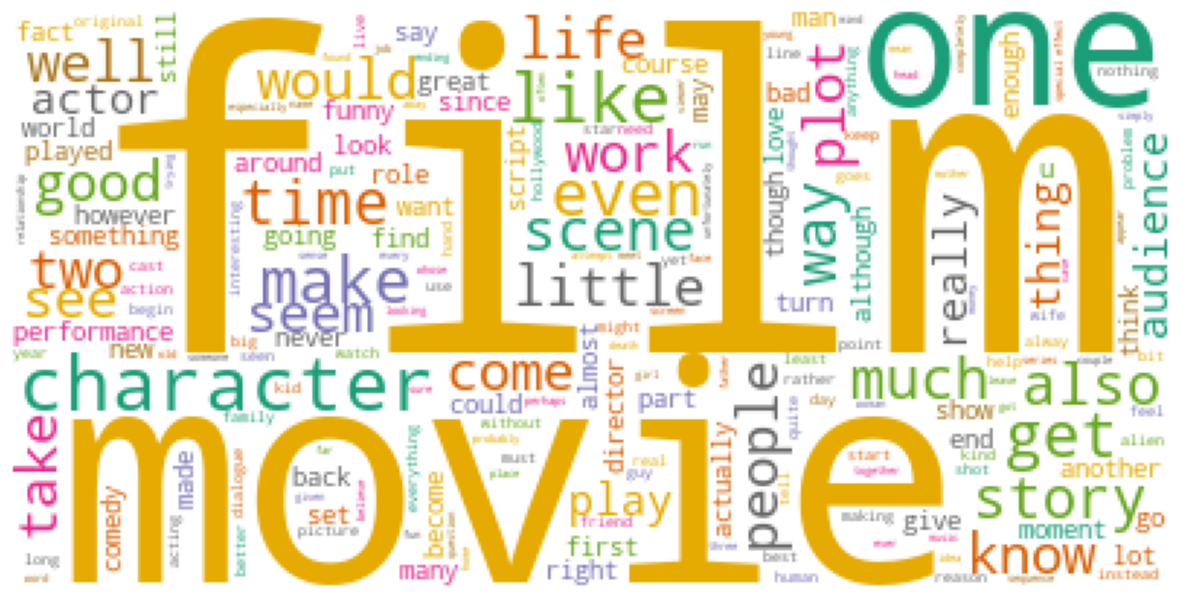

In [14]:
wc.generate(combined_words)

plt.figure(figsize = (15,10))
plt.clf()
plt.imshow(wc)
plt.axis('off')
plt.show()

## Sentiment analysis

NLTK already has a built-in, pretrained sentiment analyzer called VADER (Valence Aware Dictionary and sEntiment Reasoner).
VADER will return a sentiment score of the input text, where -1 is very negative, +1 is very positive and neutral is 0.

In [15]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Wow, NLTK is really powerful!")

{'neg': 0.0, 'neu': 0.295, 'pos': 0.705, 'compound': 0.8012}

In [16]:
sia.polarity_scores("I hate Python.")

{'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'compound': -0.5719}

In [17]:
nltk.corpus.movie_reviews.words()

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]

As the movie reviews are from a pre-existing data set, they have already been sorted into 'negative' and 'positive' categories, with unique IDs associated with each review.

In [18]:
positive_review_ids = nltk.corpus.movie_reviews.fileids(categories=["pos"])
negative_review_ids = nltk.corpus.movie_reviews.fileids(categories=["neg"])
all_review_ids = positive_review_ids + negative_review_ids

Now, we can define a function that will tell us if a review is positive by splitting the review into individual sentences and getting the mean score of the review.

In [19]:
from statistics import mean

#If average score of all sentences in the review is positive, True.
def is_positive(review_id: str) -> bool:    
    text = nltk.corpus.movie_reviews.raw(review_id)
    scores = [sia.polarity_scores(sentence)["compound"]
        for sentence in nltk.sent_tokenize(text)]
    return mean(scores) > 0

Using this function, we can rate all the reviews and see how accurate VADER is at identifying positive reviews.

In [20]:
from random import shuffle

shuffle(all_review_ids)
correct = 0
for review_id in all_review_ids:
    if is_positive(review_id):
        if review_id in positive_review_ids:
            correct += 1
    else:
        if review_id in negative_review_ids:
            correct += 1

print(F"{correct / len(all_review_ids):.2%} correct")

64.00% correct


### Positive and negative words

We can start to create sets of positive and negative words based on the predefined categories in the data, and use the frequency distribution function to determine the frequency of the words in each set.

In [21]:
unwanted = nltk.corpus.stopwords.words("english")
unwanted.extend([w.lower() for w in nltk.corpus.names.words()])

def skip_unwanted(pos_tuple):
    word, tag = pos_tuple
    if not word.isalpha() or word in unwanted:
        return False
    if tag.startswith("NN"):
        return False
    return True

positive_words = [word for word, tag in filter(
    skip_unwanted,
    nltk.pos_tag(nltk.corpus.movie_reviews.words(categories=["pos"]))
)]
negative_words = [word for word, tag in filter(
    skip_unwanted,
    nltk.pos_tag(nltk.corpus.movie_reviews.words(categories=["neg"]))
)]

In [22]:
positive_fd = nltk.FreqDist(positive_words)
negative_fd = nltk.FreqDist(negative_words)

common_set = set(positive_fd).intersection(negative_fd)

for word in common_set:
    del positive_fd[word]
    del negative_fd[word]

top_100_positive = {word for word, count in positive_fd.most_common(100)}
top_100_negative = {word for word, count in negative_fd.most_common(100)}

### Training a classifier

Now we can define a function that will return the average scores for each review and the number of words in the review that are also in the top 100 positive words.

In [25]:
def extract_features(text):
    features = dict()
    wordcount = 0
    compound_scores = list()
    positive_scores = list()

    for sentence in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sentence):
            if word.lower() in top_100_positive:
                wordcount += 1
        compound_scores.append(sia.polarity_scores(sentence)["compound"])
        positive_scores.append(sia.polarity_scores(sentence)["pos"])

    # Adding 1 to the final compound score to always have positive numbers
    # since some classifiers you'll use later don't work with negative numbers.
    features["mean_compound"] = mean(compound_scores) + 1
    features["mean_positive"] = mean(positive_scores)
    features["wordcount"] = wordcount

    return features

This will create a list of features in each text to be analysed.

In [26]:
features = [
    (extract_features(nltk.corpus.movie_reviews.raw(review)), "pos")
    for review in nltk.corpus.movie_reviews.fileids(categories=["pos"])
]
features.extend([
    (extract_features(nltk.corpus.movie_reviews.raw(review)), "neg")
    for review in nltk.corpus.movie_reviews.fileids(categories=["neg"])
])

We will now train the classifier based on the features we have just defined.

In [27]:
# Use 1/4 of the set for training
train_count = len(features) // 4
shuffle(features)
classifier = nltk.NaiveBayesClassifier.train(features[:train_count])
classifier.show_most_informative_features(10)

nltk.classify.accuracy(classifier, features[train_count:])

Most Informative Features
               wordcount = 3                 pos : neg    =      9.1 : 1.0
               wordcount = 2                 pos : neg    =      1.9 : 1.0
               wordcount = 0                 neg : pos    =      1.7 : 1.0
               wordcount = 4                 pos : neg    =      1.6 : 1.0
               wordcount = 1                 pos : neg    =      1.4 : 1.0
           mean_positive = 0.09671052631578947    neg : pos    =      1.1 : 1.0
           mean_positive = 0.10585714285714286    neg : pos    =      1.1 : 1.0
           mean_positive = 0.159             neg : pos    =      1.1 : 1.0
           mean_positive = 0.162             neg : pos    =      1.1 : 1.0


0.6573333333333333

### Classify new data

Open a text file containing a new movie review.

In [1]:
new_review = []
with open("the_boy_and_the_heron.txt", "r", encoding="utf8") as file:
    for line in file:
        new_review.extend(line.split())    

Pass the new review through the trained classifier.

In [29]:
classifier.classify(new_review)
extract_features(new_review)

AttributeError: 'list' object has no attribute 'keys'

In [9]:
combined_new_words = ' '.join(new_review)

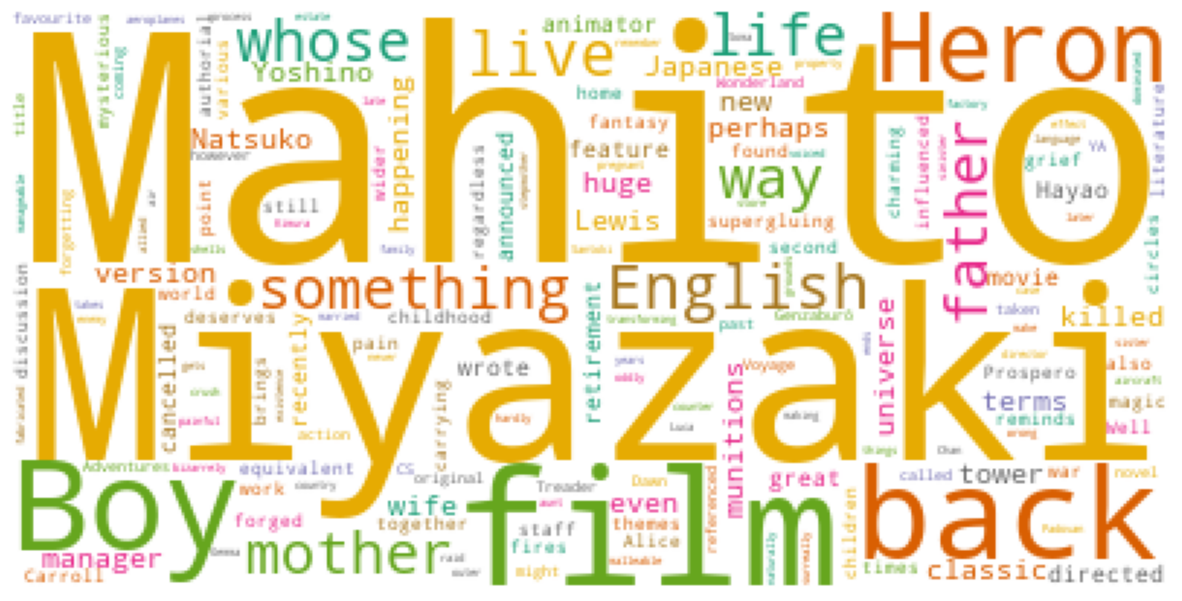

In [12]:
wc.generate(combined_new_words)

plt.figure(figsize = (15,10))
plt.clf()
plt.imshow(wc)
plt.axis('off')
plt.show()